In [344]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from pandas import Series
from matplotlib.ticker import FormatStrFormatter


## Import, Clean + Get Data Ready
### (Data From https://crime-data-explorer.app.cloud.gov/pages/downloads)

In [ ]:
df = pd.read_csv('hate_crime.csv', dtype={'INCIDENT_ID': 'Int64', 'DATA_YEAR': 'int64', 'ORI': str, 'PUB_AGENCY_NAME': str, 
                                                 'PUB_AGENCY_UNIT': 'str', 'AGENCY_TYPE_NAME': str, 'STATE_ABBR': str, 'STATE_NAME': str,
                                                 'DIVISION_NAME': str, 'REGION_NAME': str, 'OFFENDER_RACE': str, 'OFFENDER_ETHNICITY': str,
                                                 'VICTIM_COUNT': 'Int64', 'OFFENSE_NAME': str, 'TOTAL_INDIVIDUAL_VICTIMS': 'Int64', 'LOCATION_NAME': str,
                                                 'BIAS_DESC	': str, 'VICTIM_TYPES': str, 'MULTIPLE_OFFENSE': str, 'MULTIPLE_BIAS': str})
df.rename(columns = {'DATA_YEAR':'YEAR', 'STATE_NAME':'STATE', 
                    'BIAS_DESC':'BIAS_TYPE'
                    }, inplace = True)

df = df.astype({"YEAR": int})


In [356]:
crimebyyear = df.groupby(['YEAR', 'BIAS_TYPE'], as_index=False)[['TOTAL_INDIVIDUAL_VICTIMS']].apply(sum)
crimebyyear



,YEAR,BIAS_TYPE,TOTAL_INDIVIDUAL_VICTIMS
0,1991,Anti-American Indian or Alaska Native,11
1,1991,Anti-Arab,88
2,1991,Anti-Asian,265
3,1991,Anti-Atheism/Agnosticism,1
4,1991,Anti-Bisexual,2
...,...,...,...
1220,2020,Anti-Protestant,30
1221,2020,Anti-Protestant;Anti-White,1
1222,2020,Anti-Sikh,131
1223,2020,Anti-Transgender,245


In [357]:
crimebybias = df.groupby(['BIAS_TYPE'], as_index=False)[['TOTAL_INDIVIDUAL_VICTIMS']].apply(sum).sort_values(by='TOTAL_INDIVIDUAL_VICTIMS', ascending=False).reset_index()
totalcrime = crimebybias['TOTAL_INDIVIDUAL_VICTIMS'].sum() 







## Create Pie Chart of Top 10 Hate Crime Types

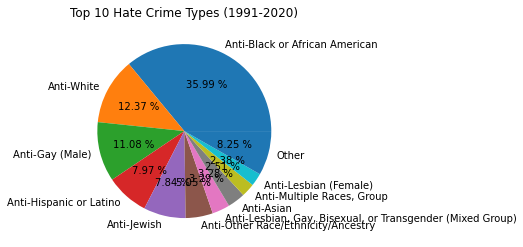

0     76587
1     26313
2     23579
3     16968
4     16677
5     10748
6      6993
7      6975
8      5335
9      5070
10    17550
Name: TOTAL_INDIVIDUAL_VICTIMS, dtype: int64

In [358]:
top10 = crimebybias['TOTAL_INDIVIDUAL_VICTIMS'].head(10).sum()
other10 = totalcrime - top10


piedata = crimebybias['TOTAL_INDIVIDUAL_VICTIMS'].head(10)

piedata.loc[len(piedata.index)] = other

labels = crimebybias['BIAS_TYPE'].head(10)
labels.loc[len(labels.index)] = "Other"
plt.pie(piedata, labels = labels, autopct='%.2f %%')
plt.title('Top 10 Hate Crime Types (1991-2020)')
plt.show()

piedata



## Create Pie Chart of Top 5 Hate Crime Types

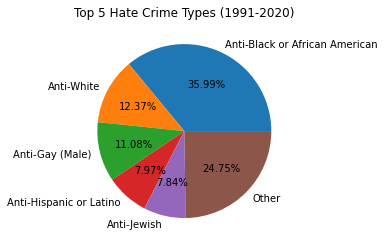

0    76587
1    26313
2    23579
3    16968
4    16677
5    52671
Name: TOTAL_INDIVIDUAL_VICTIMS, dtype: int64

In [328]:
top5 = crimebybias['TOTAL_INDIVIDUAL_VICTIMS'].head(5).sum()
other5 = totalcrime - top5


piedata = crimebybias['TOTAL_INDIVIDUAL_VICTIMS'].head(5)

piedata.loc[len(piedata.index)] = other5

labels = crimebybias['BIAS_TYPE'].head(5)
labels.loc[len(labels.index)] = "Other"
plt.pie(piedata, labels = labels, autopct='%.2f%%')
plt.title('Top 5 Hate Crime Types (1991-2020)')
plt.show()

piedata


## Calculate Year over Year Growth of Hate Crime

In [361]:
antiasian = crimebyyear[crimebyyear.BIAS_TYPE == 'Anti-Asian'].copy()
antiasian['YoY Change'] = antiasian['TOTAL_INDIVIDUAL_VICTIMS'].pct_change()

antiblack = crimebyyear[crimebyyear.BIAS_TYPE == 'Anti-Black or African American'].copy()
antiblack['YoY Change'] = antiblack['TOTAL_INDIVIDUAL_VICTIMS'].pct_change()

antijewish = crimebyyear[crimebyyear.BIAS_TYPE == 'Anti-Jewish'].copy()
antijewish['YoY Change'] = antijewish['TOTAL_INDIVIDUAL_VICTIMS'].pct_change()

antiwhite = crimebyyear[crimebyyear.BIAS_TYPE == 'Anti-White'].copy()
antiwhite['YoY Change'] = antiwhite['TOTAL_INDIVIDUAL_VICTIMS'].pct_change()

antihispanic = crimebyyear[crimebyyear.BIAS_TYPE == 'Anti-Hispanic or Latino'].copy()
antihispanic['YoY Change'] = antihispanic['TOTAL_INDIVIDUAL_VICTIMS'].pct_change()

antijewish = crimebyyear[crimebyyear.BIAS_TYPE == 'Anti-Jewish'].copy()
antijewish['YoY Change'] = antijewish['TOTAL_INDIVIDUAL_VICTIMS'].pct_change()

antitrans = crimebyyear[crimebyyear.BIAS_TYPE == 'Anti-Transgender'].copy()

antigay = crimebyyear[crimebyyear.BIAS_TYPE == 'Anti-Gay (Male)'].copy()
antigay['YoY Change'] = antigay['TOTAL_INDIVIDUAL_VICTIMS'].pct_change()


## Fill Missing (1991 - 2012) Trans Data with 0

In [371]:
ndtrans["YEAR"] = pd.to_datetime(ndtrans.YEAR, format='%Y')
dftrans = pd.DataFrame.from_dict(ndtrans)
dftrans.set_index("YEAR",inplace=True)
dtrtrans = pd.date_range('1991', '2020', freq='AS')
strans = pd.Series(index=dtrtrans, dtype=int)
ndtrans.replace(to_replace="01-01", value="12-31")
dftrans = pd.concat([dftrans,strans[~strans.index.isin(dftrans.index)]]).sort_index()
dftrans.reset_index(inplace=True)
dftrans = dftrans.rename(columns = {'index':'YEAR'})
antitrans = dftrans.drop([0],axis=1).fillna(0)
antitrans['YoY Change'] = antitrans['TOTAL_INDIVIDUAL_VICTIMS'].pct_change()

antitrans



,YEAR,BIAS_TYPE,TOTAL_INDIVIDUAL_VICTIMS,YoY Change
0,1991-01-01,0,0.0,NaN
1,1992-01-01,0,0.0,NaN
2,1993-01-01,0,0.0,NaN
3,1994-01-01,0,0.0,NaN
4,1995-01-01,0,0.0,NaN
5,1996-01-01,0,0.0,NaN
6,1997-01-01,0,0.0,NaN
7,1998-01-01,0,0.0,NaN
8,1999-01-01,0,0.0,NaN
9,2000-01-01,0,0.0,NaN


## Create Line Graph for Top 5 Hate Crime Bias YoY Change

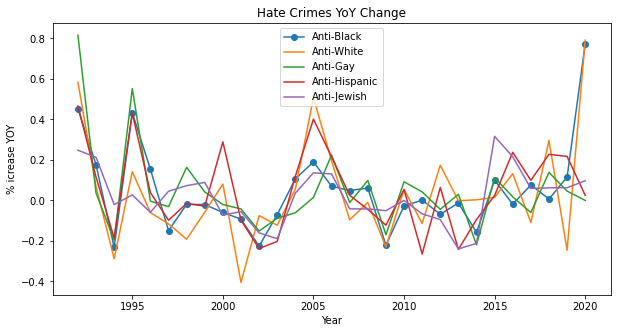

In [364]:
x = antiasian['YEAR']

y1 = antiblack['YoY Change']
y2 = antiwhite['YoY Change']
y3 = antigay['YoY Change']
y4 = antihispanic['YoY Change']
y5 = antijewish['YoY Change']

plt.figure(figsize=(10, 5))
plt.plot( x, y1, marker='o')
plt.plot( x, y2, marker='')
plt.plot( x, y3, marker='')
plt.plot( x, y4, marker='')
plt.plot( x, y5, marker='')

plt.title("Hate Crimes YoY Change")
plt.xlabel("Year")
plt.legend(["Anti-Black", "Anti-White", "Anti-Gay", "Anti-Hispanic", "Anti-Jewish"])

plt.ylabel("% icrease YOY")

plt.show()

## Add Anti-Asian and Anti-Trans to YOY Change Graph

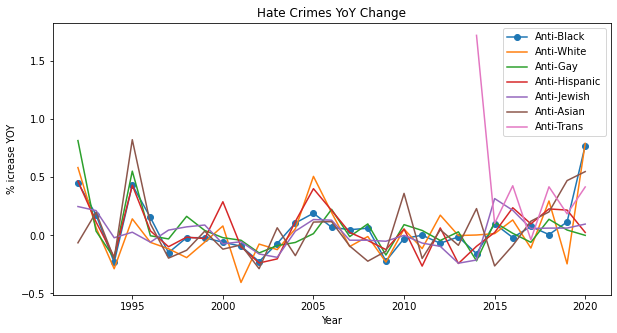

In [365]:
x = antiasian['YEAR']

y1 = antiblack['YoY Change']
y2 = antiwhite['YoY Change']
y3 = antigay['YoY Change']
y4 = antihispanic['YoY Change']
y5 = antijewish['YoY Change']
y6 = antiasian['YoY Change']
y7 = antitrans['YoY Change']


plt.figure(figsize=(10, 5))
plt.plot( x, y1, marker='o')
plt.plot( x, y2, marker='')
plt.plot( x, y3, marker='')
plt.plot( x, y4, marker='')
plt.plot( x, y5, marker='')
plt.plot( x, y6, marker='')
plt.plot( x, y7, marker='')
plt.title("Hate Crimes YoY Change")
plt.xlabel("Year")
plt.legend(["Anti-Black", "Anti-White", "Anti-Gay", "Anti-Hispanic", "Anti-Jewish", "Anti-Asian", "Anti-Trans"])

plt.ylabel("% icrease YOY")

plt.show()

## Create Race Population Table
### (Data from https://www.statista.com/statistics/183489/population-of-the-us-by-ethnicity-since-2000/)

In [366]:
pop_data = {
        'YEAR': [2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000],
    'WHITE': [250.56, 250.52, 249.96, 249.27, 248.41, 247.38, 246.35, 245.31, 244.35, 243.29, 242.24, 241.03, 239.78, 238.38, 236.95, 235.49, 234.12, 232.72, 231.45, 230.05, 228.53],
    'BLACK': [44.78, 44.08, 43.73, 43.37, 42.97, 42.53, 42.09, 41.65, 41.23, 40.78, 40.36, 39.9, 39.43, 38.94, 38.44, 37.96, 37.51, 37.07, 36.68, 36.26, 35.81],
    'ASIAN': [20.17, 19.5, 19.13, 18.76, 18.28, 17.75, 17.2, 16.68, 16.2, 15.72, 15.26, 14.83, 14.4, 13.93, 13.48, 13.01, 12.54, 12.1, 11.65, 11.18, 10.71]
}


dfpop = pd.DataFrame(pop_data)
dfpop

,YEAR,WHITE,BLACK,ASIAN
0,2020,250.56,44.78,20.17
1,2019,250.52,44.08,19.50
2,2018,249.96,43.73,19.13
3,2017,249.27,43.37,18.76
4,2016,248.41,42.97,18.28
5,2015,247.38,42.53,17.75
6,2014,246.35,42.09,17.20
7,2013,245.31,41.65,16.68
8,2012,244.35,41.23,16.20
9,2011,243.29,40.78,15.72


## Calculate percentage of hate crime victims by population

In [367]:
popwhite = pd.DataFrame(dfpop[['YEAR', 'WHITE']]).copy()

whitedata = pd.merge(
    antiwhite,
    popwhite,
    on=['YEAR']
)

whitedata['% of Hate Crime Population'] = whitedata['TOTAL_INDIVIDUAL_VICTIMS'] / ( whitedata['WHITE'] * 1000000)
whitedata

,YEAR,BIAS_TYPE,TOTAL_INDIVIDUAL_VICTIMS,YoY Change,WHITE,% of Hate Crime Population
0,2000,Anti-White,963,0.080808,228.53,0.000004
1,2001,Anti-White,573,-0.404984,230.05,0.000002
2,2002,Anti-White,530,-0.075044,231.45,0.000002
3,2003,Anti-White,465,-0.122642,232.72,0.000002
4,2004,Anti-White,491,0.055914,234.12,0.000002
5,2005,Anti-White,740,0.507128,235.49,0.000003
6,2006,Anti-White,885,0.195946,236.95,0.000004
7,2007,Anti-White,800,-0.096045,238.38,0.000003
8,2008,Anti-White,792,-0.010000,239.78,0.000003
9,2009,Anti-White,610,-0.229798,241.03,0.000003


In [368]:
popblack = pd.DataFrame(dfpop[['YEAR', 'BLACK']]).copy()


blackdata = pd.merge(
    antiblack,
    popblack,
    on=['YEAR']
)

blackdata['% of Hate Crime Population'] = blackdata['TOTAL_INDIVIDUAL_VICTIMS'] / ( blackdata['BLACK'] * 1000000)
blackdata



,YEAR,BIAS_TYPE,TOTAL_INDIVIDUAL_VICTIMS,YoY Change,BLACK,% of Hate Crime Population
0,2000,Anti-Black or African American,2944,-0.059425,35.81,0.000082
1,2001,Anti-Black or African American,2671,-0.092731,36.26,0.000074
2,2002,Anti-Black or African American,2069,-0.225384,36.68,0.000056
3,2003,Anti-Black or African American,1924,-0.070082,37.07,0.000052
4,2004,Anti-Black or African American,2128,0.106029,37.51,0.000057
5,2005,Anti-Black or African American,2533,0.190320,37.96,0.000067
6,2006,Anti-Black or African American,2711,0.070272,38.44,0.000071
7,2007,Anti-Black or African American,2843,0.048691,38.94,0.000073
8,2008,Anti-Black or African American,3017,0.061203,39.43,0.000077
9,2009,Anti-Black or African American,2350,-0.221081,39.90,0.000059


In [251]:
popasian = pd.DataFrame(dfpop[['YEAR', 'ASIAN']]).copy()

asiandata = pd.merge(
    antiasian,
    popasian,
    on=['YEAR']
)

asiandata['% of Hate Crime Population'] = asiandata['TOTAL_INDIVIDUAL_VICTIMS'] / ( asiandata['ASIAN'] * 1000000)
asiandata



,YEAR,BIAS_TYPE,TOTAL_INDIVIDUAL_VICTIMS,YoY Change,ASIAN,% of Hate Crime Population
0,2000,Anti-Asian,304,-0.118841,10.71,0.000028
1,2001,Anti-Asian,279,-0.082237,11.18,0.000025
2,2002,Anti-Asian,199,-0.286738,11.65,0.000017
3,2003,Anti-Asian,212,0.065327,12.10,0.000018
4,2004,Anti-Asian,175,-0.174528,12.54,0.000014
5,2005,Anti-Asian,195,0.114286,13.01,0.000015
6,2006,Anti-Asian,218,0.117949,13.48,0.000016
7,2007,Anti-Asian,198,-0.091743,13.93,0.000014
8,2008,Anti-Asian,154,-0.222222,14.40,0.000011
9,2009,Anti-Asian,133,-0.136364,14.83,0.000009


## Create Graph of Hate Crime as a Percentage of Race Population

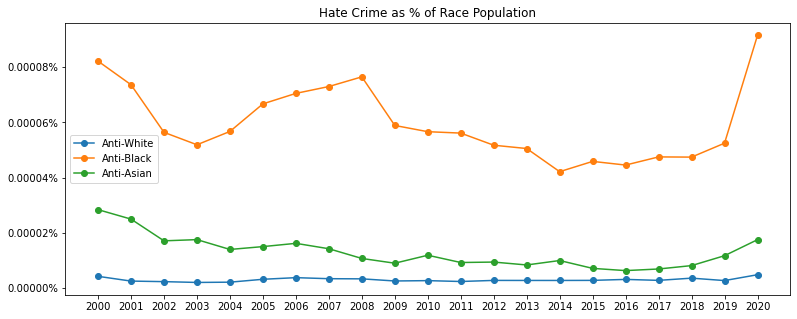

In [370]:
x = whitedata['YEAR']


y1 = whitedata['% of Hate Crime Population']
y2 = blackdata['% of Hate Crime Population']
y3 = asiandata['% of Hate Crime Population']

plt.figure(figsize=(13, 5))
plt.plot( x, y1, marker='o')
plt.plot( x, y2, marker='o')
plt.plot( x, y3, marker='o')

plt.title("Hate Crime as % of Race Population")
plt.xticks(np.arange(min(x), max(x)+1, 1.0))

plt.legend(["Anti-White", "Anti-Black", "Anti-Asian"])

plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.5f%%'))

plt.show()